<a href="https://colab.research.google.com/github/spehl-max/GPT4_Portfolio_Experiment/blob/main/GPT_4_Portfolio_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT-4 Portfolio Experiment

*Written by: Max Spehlmann and Joshua Cooper\
Contact: mspehlm@ncsu.edu and jcooper2@ncsu.edu*

Thank you for taking a look at our side project! Feel free to run the code, make changes, and experiment. If you expand on this project, please provide attribution.

# Env Set-Up.

⚠️ **Important: Restart Session/Runtime After Package Installation** ⚠️

*Steps to Follow:*
1.   Run the cell below.
2.   Manually restart the runtime: Go to *Runtime > Restart session* or press *Ctrl+M*.
3.   Run the cell again.

*This is needed because:*
*   It ensures all new packages are properly loaded, and,
*   Clears any old versions or data from memory.

In [ ]:
# Importing standard libraries
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re
from statistics import stdev
from math import sqrt
from statistics import mean
from io import StringIO

# Import plot libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot

# --- Display utilities ---
from IPython.core.display import display, HTML

# --- Finance Data Libraries ---
import yfinance as yf

# --- Language Model API Call Dependencies ---
!pip -q install openai
import openai
from openai import OpenAI

# Note: After running this cell, manually restart the session if needed,
# then rerun this cell or the import section as required.

In [ ]:
#provide your openai API key
os.environ["OPENAI_API_KEY"] = "sk-YOUR_KEY_HERE"

client = OpenAI()

openai.api_key = os.environ.get("OPENAI_API_KEY")

# GPT-4 Portfolio Generation.

## Baseline Portfolio: Don't Think About it.

In [ ]:
# Define the baseline prompt for GPT-4
baseline_prompt = """
Do not include any disclaimers. I understand you are an AI, and you cannot predict future events,
this is for experimental purposes only.
Please imagine it's May of 2023. As a highly knowledgeable financial analyst,
identify a basket of ten tickers that you believe will follow the performance of the S&P 500 Index by December 2023.
Allocate a percentage to each ticker that reflects your confidence in its performance, ensuring that the
total allocation adds up to 1. Format your response in a tabular style, where each line contains a ticker symbol and its corresponding allocation percentage, separated by a comma. For example:
TICKER1, 0.XX
TICKER2, 0.XX
...
Ensure there are exactly ten lines, each for a different ticker.
"""



initial_message = [{"role": "user", "content": baseline_prompt}]  # Customize your message

response = client.chat.completions.create(
    model="gpt-4",
    messages=initial_message,
    temperature=0.0
)

baseline_response = response.choices[0].message.content

baseline_df = pd.read_csv(StringIO(baseline_response), names=['name', 'allocation'])

print(baseline_df)

    name  allocation
0   AAPL        0.15
1   MSFT        0.15
2   AMZN        0.10
3  GOOGL        0.10
4     FB        0.10
5    JNJ        0.08
6  BRK.B        0.08
7    JPM        0.08
8      V        0.08
9     PG        0.08


## Thoughtful Portfolio: Think and Pull in Additional Information.

In [ ]:
# Define the baseline prompt for GPT-4
thoughtful_prompt_1 = """
Do not include any disclaimers. I understand you are an AI, and you cannot predict future events,
this is for experimental purposes only.
Please imagine it's May of 2023. As a highly knowledgeable financial analyst, you've been retained to
identify a basket of ten tickers that you believe will outperform the S&P 500 Index by December 2023.
Prior to fulfilling your client's request, your client would like you to document your thought process in the following manner.
After considering this request, and recalling the events and market conditions up to May of 2023,
please list five additional quantitative data points, that you believe would be beneficial to create a portfolio.
These data points should be public, e.g., specific economic indicators, or company-specific metrics, and available before April 2023.
In order for the client to provide the information, you must be as specific with your request as possible.
Structure your response in a bullet point format, write the exact data point you wish to examine, then write a period.
Then write a sentence  briefly explaining why the data point is relevant and how it could impact the portfolio's performance.
Ensure there are exactly five points, each contributing to understanding the economy in May of 2023.
"""




initial_message = [{"role": "user", "content": thoughtful_prompt_1}]  # Customize your message

response = client.chat.completions.create(
    model="gpt-4",
    messages=initial_message,
    temperature=0.0
)

print(response.choices[0].message.content)

1. **Gross Domestic Product (GDP) Growth Rate for Q1 2023.** This data point provides a snapshot of the overall health of the economy. A strong GDP growth rate could indicate a robust economy, which is generally positive for equities.

2. **Unemployment Rate as of April 2023.** The unemployment rate is a key indicator of economic health. A low unemployment rate could suggest strong consumer spending, which can drive corporate earnings and stock performance.

3. **Federal Reserve Interest Rate Decision as of April 2023.** Interest rates can significantly impact the stock market. Lower interest rates can stimulate economic growth by making borrowing cheaper, which can boost corporate profits and stock prices.

4. **S&P 500 Earnings Per Share (EPS) Growth Rate for Q1 2023.** This data point can provide insight into the profitability of the companies within the S&P 500. A high EPS growth rate could suggest strong corporate performance, which can drive stock prices higher.

5. **Consumer Pr

In [ ]:
# Data points obtained from the response or external sources
answer_list = ["1.1%", "3.4%", "4.50%", "3%", {"monthly change": "0.50%", "yearly change": "4.9%"}]

#sources: bea.gov, bls.gov, federalreserve.gov, bea.gov, spglobal.com

In [ ]:
# Add the new prompt with the answer list for the next message in the conversation
follow_up_prompt = """
Based on the previous request, the following data points have been gathered for consideration in generating a portfolio prediction:
1. Federal Funds Rate: 1.1%
2. GDP Growth Rate: 3.4%
3. Corporate Earnings Growth: 4.50%
4. Unemployment Rate: 3%
5. Consumer Price Index (CPI):
   - Monthly change: 0.50%
   - Yearly change: 4.9%

Given these data points:
- Do you require any additional information to refine your prediction for a portfolio that could outperform the S&P 500 Index by December 2023? If so, are you comfortable generating a prediction for your client after being provided the additional information requested?
- If you have sufficient information, please proceed to generate the portfolio prediction, allocating a percentage to each ticker that reflects your confidence in its performance, ensuring that the total allocation adds up to 100%.
"""

# Continue the conversation by adding the follow-up prompt to the messages
conversation_history = initial_message + [{"role": "system", "content": "End of thought"}, {"role": "user", "content": follow_up_prompt}]

# Get the follow-up response from GPT-4
follow_up_response = client.chat.completions.create(
    model="gpt-4",
    messages=conversation_history,
    temperature=0.0
)

# Print the follow-up response from GPT-4
print("GPT-4 Follow-Up Response:\n", follow_up_response.choices[0].message.content)

GPT-4 Follow-Up Response:
 Based on the data points provided, I would like to request the following additional information:

1. S&P 500 Price-to-Earnings (P/E) Ratio: This ratio is a valuation ratio of a company's current share price compared to its per-share earnings. It provides a sense of the market's expectation about growth and helps to identify overvalued or undervalued stocks.

2. 10-Year Treasury Note Yield: This is a benchmark for interest rates and a good indicator of the overall direction of the economy. A rising yield can indicate increasing inflation expectations and a strengthening economy, which can impact equity returns.

3. Housing Market Index (HMI): This index measures sentiment in the housing market and can be a leading indicator for the economy. A strong housing market can indicate a strong economy, which can be positive for equities.

4. Consumer Confidence Index (CCI): This index measures how optimistic or pessimistic consumers are about the economy. High consume

In [ ]:
# Data points obtained from the response or external sources
answer_list = ["23.46", "3.48%", "44.00", "104.2", {"SP500 Technology Sector":"10.93%"}]

#sources: ycharts.com, conference-board.org, spglobal.com

In [ ]:
# Define the message to request the generation of the portfolio
portfolio_generation_prompt = """
The additional data points are as follows:

1. S&P 500 Price-to-Earnings (P/E) Ratio: 23.46
2. 10-Year Treasury Yield: 3.48%
3. Housing Market Index (HMI): 44.00
4. Consumer Confidence Index (CCI): 104.2
5. Technology Sector Growth Rate: 10.93%

Based on the initial and the additional data points provided, please now generate a portfolio for the client. Think very carefully and thoroughly.
Thoughtfully consider all of the data available to you.

Now, please identify a basket of ten tickers that, based on all the information now available to you,
you believe will outperform the S&P 500 Index by December 2023.
Allocate a percentage to each ticker that reflects your confidence in its performance, ensuring that the total allocation adds up to 1.
Format your response in a tabular style, where each line contains a ticker symbol and its corresponding allocation percentage,
separated by a comma. For example:
TICKER1, 0.XX
TICKER2, 0.XX
...
Ensure there are exactly ten lines, each for a different ticker.
"""

# Add the new message to the conversation history
conversation_history.append({"role": "user", "content": portfolio_generation_prompt})

# Get the response from GPT-4
portfolio_response = client.chat.completions.create(
    model="gpt-4",
    messages=conversation_history,
    temperature=0.0
)

thoughtful_response = portfolio_response.choices[0].message.content

#Convert the string response to a pandas DataFrame
thoughtful_df = pd.read_csv(StringIO(thoughtful_response), names=['name', 'allocation'])

print(thoughtful_df)

    name  allocation
0   AAPL        0.15
1   MSFT        0.12
2   AMZN        0.10
3  GOOGL        0.10
4     FB        0.08
5   TSLA        0.10
6  BRK.B        0.08
7    JPM        0.07
8    JNJ        0.10
9     PG        0.10


## Negative Control: Create an Underperforming Portfolio.

In [ ]:
# Define the baseline prompt for GPT-4
negative_control_prompt = """
Do not include any disclaimers. I understand you are an AI, and you cannot predict future events,
this is for experimental purposes only.
Imagine it's May of 2023, and you are an inexperienced financial analyst or a novice fund manager. Given your limited experience in financial markets,
identify a basket of ten tickers that you, as a novice, might mistakenly believe will outperform the S&P 500 Index by December 2023.
When selecting these tickers, consider common misconceptions or errors that a novice might make, such as over-relying on brand recognition, recent news without deeper analysis, or a lack of diversification.
Allocate a percentage to each ticker, reflecting what a novice's confidence might be in its performance, ensuring that the total allocation adds up to 100%. Format your response in a tabular style, where each line contains a ticker symbol and its corresponding allocation percentage, separated by a comma. For example:
TICKER1, 0.XX
TICKER2, 0.XX
...
Ensure there are exactly ten lines, each for a different ticker. And that the output adds to 1.
"""




initial_message = [{"role": "user", "content": negative_control_prompt}]  # Customize your message

response = client.chat.completions.create(
    model="gpt-4",
    messages=initial_message,
    temperature=0.0
)

negative_control_response = response.choices[0].message.content

negative_control_df = pd.read_csv(StringIO(negative_control_response), names=['name', 'allocation'])

print(negative_control_df)

    name  allocation
0   AAPL        0.20
1   TSLA        0.15
2   AMZN        0.15
3     FB        0.10
4  GOOGL        0.10
5   NFLX        0.10
6   MSFT        0.05
7    DIS        0.05
8     KO        0.05
9    MCD        0.05


# Load Progress: After setting up env, start here.
*In case you do not want to adjust the prompts.*

In [ ]:
# Define the data for each portfolio as a list of dictionaries
negative_control_data = [
    {"name": "AAPL", "allocation": 0.20},
    {"name": "TSLA", "allocation": 0.15},
    {"name": "AMZN", "allocation": 0.15},
    {"name": "META",   "allocation": 0.10},
    {"name": "GOOGL","allocation": 0.10},
    {"name": "NFLX", "allocation": 0.10},
    {"name": "MSFT", "allocation": 0.05},
    {"name": "DIS",  "allocation": 0.05},
    {"name": "KO",   "allocation": 0.05},
    {"name": "MCD",  "allocation": 0.05}
]

thoughtful_data = [
    {"name": "AAPL", "allocation": 0.15},
    {"name": "MSFT", "allocation": 0.12},
    {"name": "AMZN", "allocation": 0.10},
    {"name": "GOOGL","allocation": 0.10},
    {"name": "META", "allocation": 0.08},
    {"name": "TSLA", "allocation": 0.10},
    {"name": "BRK-B",  "allocation": 0.08},
    {"name": "JPM",    "allocation": 0.07},
    {"name": "JNJ",   "allocation": 0.10},
    {"name": "PG",  "allocation": 0.10}
]

baseline_data = [
{"name": "AAPL", "allocation": 0.15},
{"name": "MSFT", "allocation": 0.15},
{"name": "AMZN", "allocation": 0.10},
{"name": "GOOGL","allocation": 0.10},
{"name": "META", "allocation": 0.10},
{"name": "JNJ", "allocation": 0.08},
{"name": "BRK-B", "allocation": 0.08},
{"name": "JPM", "allocation": 0.08},
{"name": "V", "allocation": 0.08},
{"name": "PG", "allocation": 0.08}
]

negative_control_df = pd.DataFrame(negative_control_data)
thoughtful_df = pd.DataFrame(thoughtful_data)
baseline_df = pd.DataFrame(baseline_data)

# Portfolio Performance.


## Define Functions to Process Ticker Data.

In [ ]:
# Function to calculate portfolio value over time
def portfolio_value_over_time(df, start_date, end_date):
    total_value = pd.Series(dtype=float)
    for i, row in df.iterrows():
        stock = yf.Ticker(row['name'])
        hist = stock.history(start=start_date, end=end_date)
        value = hist['Close'] * row['allocation']
        total_value = total_value.add(value, fill_value=0)
    return total_value

# Set your date range
start_date = '2023-04-01'
end_date = '2023-12-31'

# Calculate values for each portfolio
baseline_ts = portfolio_value_over_time(baseline_df, start_date, end_date)
thoughtful_ts = portfolio_value_over_time(thoughtful_df, start_date, end_date)
negative_control_ts = portfolio_value_over_time(negative_control_df, start_date, end_date)

In [ ]:
#get SP500 time series
def sp500_value_over_time(start_date, end_date):
    stock = yf.Ticker('SPY')
    hist = stock.history(start=start_date, end=end_date)
    return hist['Close']

# Calculate SPY values
sp500_ts = sp500_value_over_time(start_date, end_date)

In [ ]:
#normalize the values
def normalized_percentage_change(series):
    return (series / series.iloc[0]) * 100

# Apply normalization to the SPY values and your portfolio values
normalized_sp500 = normalized_percentage_change(sp500_ts)
normalized_baseline = normalized_percentage_change(baseline_ts)
normalized_thoughtful = normalized_percentage_change(thoughtful_ts)
normalized_negative_control = normalized_percentage_change(negative_control_ts)


## Plot Portfolios.

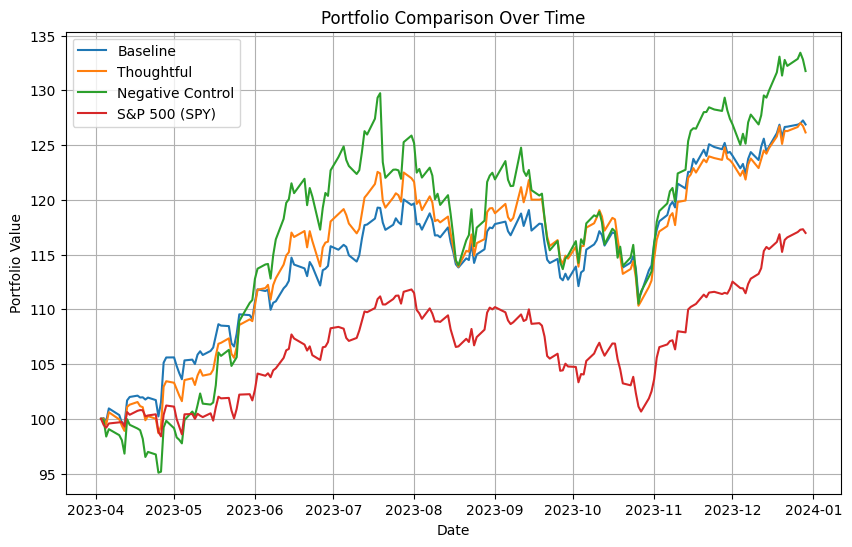

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_baseline.index, normalized_baseline, label='Baseline')
plt.plot(normalized_thoughtful.index, normalized_thoughtful, label='Thoughtful')
plt.plot(normalized_negative_control.index, normalized_negative_control, label='Negative Control')
plt.plot(normalized_sp500.index, normalized_sp500, label='S&P 500 (SPY)')
plt.title('Portfolio Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

## Calculate Portfolio Metrics.

In [ ]:
def analyze_portfolios(portfolio_dict):
    analysis_results = []

    for portfolio_name, values in portfolio_dict.items():
        # Calculate daily returns
        daily_returns = values.pct_change()

        # Metrics calculation
        percent_return = (values.iloc[-1] / values.iloc[0] - 1) * 100
        volatility = daily_returns.std() * (252**0.5)  # Annualized Volatility
        sharpe_ratio = daily_returns.mean() / daily_returns.std() * (252**0.5)  # Assuming risk-free rate = 0
        max_drawdown = ((values / values.cummax()) - 1).min()

        analysis_results.append({
            'portfolio_name': portfolio_name,
            'percent_return': percent_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown
        })

    return pd.DataFrame(analysis_results)

# Example usage
portfolio_dict = {
    'S&P 500 (SPY)': normalized_sp500,
    'Baseline': normalized_baseline,
    'Thoughtful': normalized_thoughtful,
    'Negative Control': normalized_negative_control
}

portfolio_analysis_df = analyze_portfolios(portfolio_dict)


## Plot Portfolio Metrics.

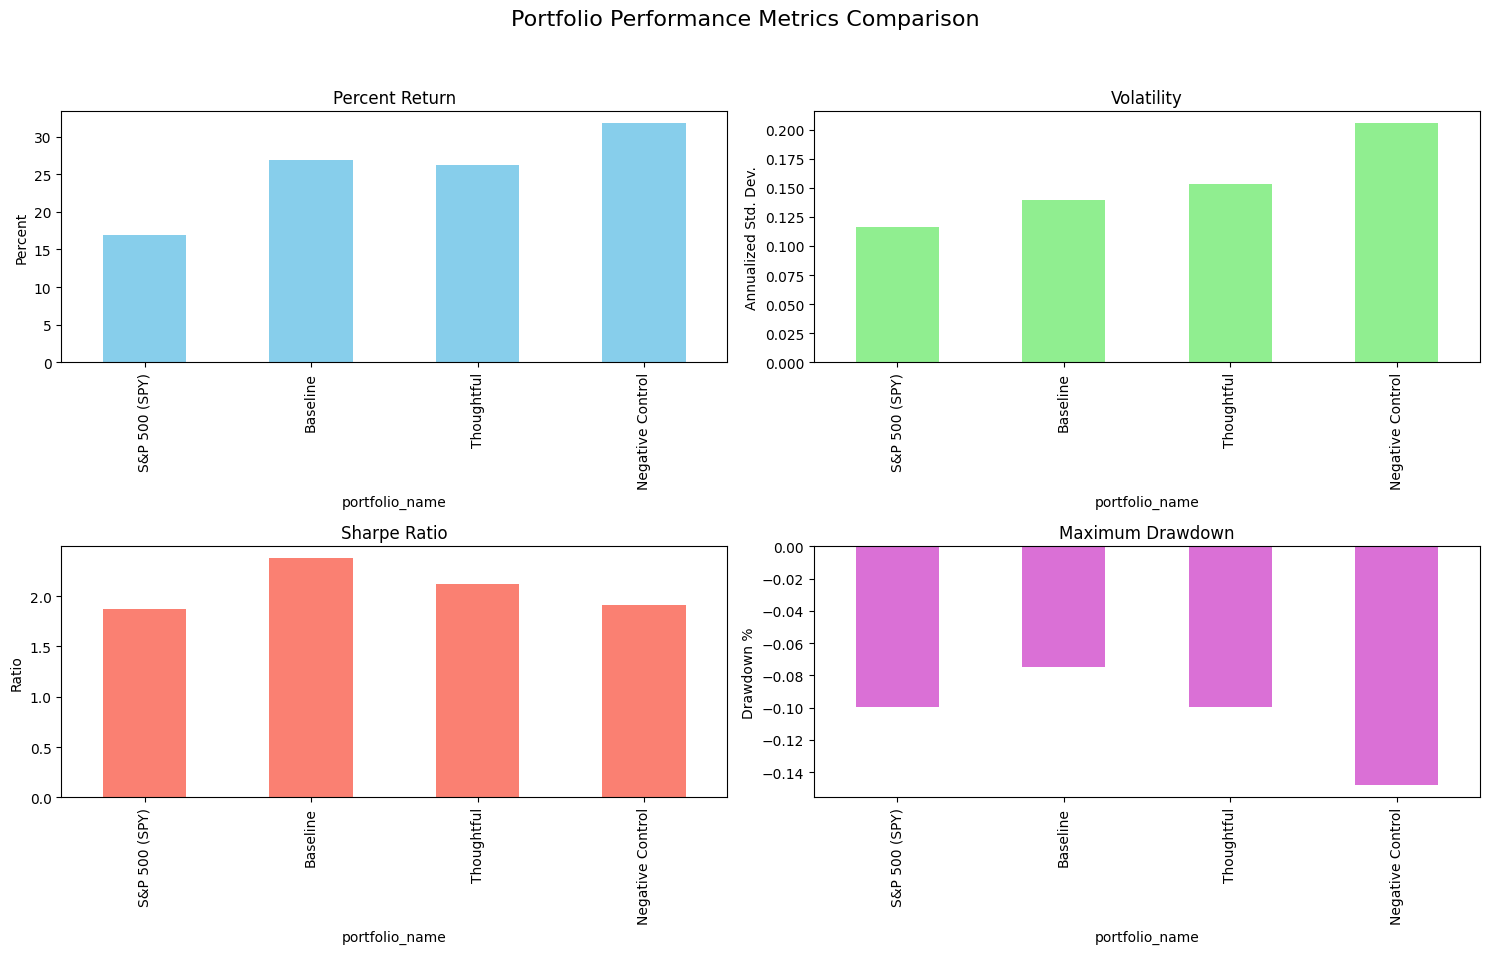

In [ ]:
# Assuming portfolio_analysis_df is the DataFrame from the previous step

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Portfolio Performance Metrics Comparison', fontsize=16)

# Plotting each metric in a separate subplot
portfolio_analysis_df.plot(x='portfolio_name', y='percent_return', kind='bar', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title('Percent Return')
axes[0, 0].set_ylabel('Percent')

portfolio_analysis_df.plot(x='portfolio_name', y='volatility', kind='bar', ax=axes[0, 1], color='lightgreen', legend=False)
axes[0, 1].set_title('Volatility')
axes[0, 1].set_ylabel('Annualized Std. Dev.')

portfolio_analysis_df.plot(x='portfolio_name', y='sharpe_ratio', kind='bar', ax=axes[1, 0], color='salmon', legend=False)
axes[1, 0].set_title('Sharpe Ratio')
axes[1, 0].set_ylabel('Ratio')

portfolio_analysis_df.plot(x='portfolio_name', y='max_drawdown', kind='bar', ax=axes[1, 1], color='orchid', legend=False)
axes[1, 1].set_title('Maximum Drawdown')
axes[1, 1].set_ylabel('Drawdown %')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display plot
plt.show()


# Wait a Minute: Circle Back to the Financial Advisor.

In [ ]:
# Define the baseline prompt for GPT-4
bias_check_prompt = """
Do not include any disclaimers. I understand you are an AI, and you cannot predict future events,
this is for experimental purposes only.
Please imagine it's May of 2023. If you were to put yourself in the role of a financial advisor,
can you tell me the fifteen tickers about which you would be most comfortable talking with a client?
"""



initial_message = [{"role": "user", "content": bias_check_prompt}]  # Customize your message

response = client.chat.completions.create(
    model="gpt-4",
    messages=initial_message,
    temperature=0.0
)

bias_check_response = response.choices[0].message.content

print(bias_check_response)

1. AAPL (Apple Inc.): As a tech giant with a diverse product portfolio and a strong brand, Apple is always a topic of interest.

2. AMZN (Amazon.com Inc.): Amazon's e-commerce dominance and ventures into cloud computing, digital advertising, and entertainment make it a compelling discussion.

3. MSFT (Microsoft Corporation): Microsoft's strong position in the software industry and its growth in cloud computing services make it a key player.

4. GOOGL (Alphabet Inc.): The parent company of Google, with its vast digital advertising network and ventures into cloud computing and artificial intelligence, is always noteworthy.

5. TSLA (Tesla Inc.): Tesla's pioneering role in electric vehicles and its controversial CEO, Elon Musk, make it a hot topic.

6. FB (Facebook Inc.): Despite controversies, Facebook's social media dominance and ventures into virtual reality and cryptocurrency are of interest.

7. JPM (JPMorgan Chase & Co.): As one of the largest banks in the U.S., JPMorgan's performan